In [1]:
#Importación de librearias
import pandas as pd
import numpy as np
#Librería para la normalización de datos 
from sklearn.preprocessing import StandardScaler
# Librería para aplicación de Componentes Princiales
from sklearn.decomposition import PCA
#Liberías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# Librearías  para clusterización y métricas de evaluación
from sklearn.cluster import KMeans,AgglomerativeClustering 
# Libería para el gráfico clústeres aglomerativos
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score
#Librería para el manejo de mapas 
import geopandas as gpd


import warnings
warnings.filterwarnings('ignore')
# Opción para despliegue de datos en formato numérico 
pd.options.display.float_format = '{:.0f}'.format

In [2]:
#Subida de archivos 

#Importación de datos agreagados de declaraciones de los años 2020 y 2021
url_datos_2020= 'https://raw.githubusercontent.com/byronodg/REPOSITORIO_TFM/main/CLUSTERIZACION/sri_ventas_2020L.csv'
data_2020=pd.read_csv(url_datos_2020, encoding = "ISO-8859-1", sep=";")
url_datos_2021=  "https://raw.githubusercontent.com/byronodg/REPOSITORIO_TFM/main/CLUSTERIZACION/sri_ventas_2021L.csv"
data_2021=pd.read_csv(url_datos_2021, encoding = "ISO-8859-1", sep=";")

#Consolidación de datos
data_total=pd.concat([data_2020,data_2021])

# Importación de datos relacionados al número de habitantes por provincia y cantón
url_poblacion_ecuador='https://raw.githubusercontent.com/byronodg/TFM/main/poblacion_ecu_2020.csv'

data_poblacion_canton=pd.read_csv(url_poblacion_ecuador, encoding = "ISO-8859-1", sep=";")

#Generación de datos agregados de población por provincia
data_poblacion_provincia=data_poblacion_canton.groupby(["PROVINCIA"]).sum().reset_index()


In [3]:
data_total.info()
data_poblacion_canton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99747 entries, 0 to 49768
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AÑO                       49978 non-null  float64
 1   MES                       99737 non-null  float64
 2   CODIGO_SECTOR_N1          99737 non-null  object 
 3   PROVINCIA                 99737 non-null  object 
 4   CANTON                    99737 non-null  object 
 5   Ventas netas tarifa 12%   99737 non-null  object 
 6   Ventas netas tarifa 0%    99737 non-null  object 
 7   EXPORTACIONES             99737 non-null  object 
 8   Compras netas tarifa 12%  99737 non-null  object 
 9   Compras netas tarifa 0%   99737 non-null  object 
 10  IMPORTACIONES             99737 non-null  object 
 11  COMPRAS_RISE              99737 non-null  object 
 12  TOTAL_COMPRAS             99737 non-null  object 
 13  TOTAL_VENTAS              99737 non-null  object 
 14  LA CON

In [4]:
#Transformación de campos numéricos : Es una transformaciòn previa debido a problemas por el uso de comas y puntos para formtos numéricos

campos_numericos=['Ventas netas tarifa 12%','Ventas netas tarifa 0%','EXPORTACIONES',
                 'Compras netas tarifa 12%','Compras netas tarifa 0%','IMPORTACIONES'
                ,'COMPRAS_RISE' ,'TOTAL_COMPRAS','TOTAL_VENTAS']

for campo in campos_numericos:
  data_total[campo]=data_total[campo].str.replace(',','.')  
  data_total[campo]= data_total[campo].astype('float64')

data_total['AÑO']= data_total['AÑO'].astype('str')
data_total['MES']= data_total['MES'].astype('str')

In [5]:
#Verificaciìn de existencia de nulos
data_poblacion_canton.isna().sum()
data_total.isna().sum()
data_total.dropna(inplace=True)
data_total.isna().sum()

AÑO                         0
MES                         0
CODIGO_SECTOR_N1            0
PROVINCIA                   0
CANTON                      0
Ventas netas tarifa 12%     0
Ventas netas tarifa 0%      0
EXPORTACIONES               0
Compras netas tarifa 12%    0
Compras netas tarifa 0%     0
IMPORTACIONES               0
COMPRAS_RISE                0
TOTAL_COMPRAS               0
TOTAL_VENTAS                0
LA CONCORDIA                0
dtype: int64

In [6]:
df1 = data_total[data_total.duplicated(keep=False)]
df1.count()

AÑO                         0
MES                         0
CODIGO_SECTOR_N1            0
PROVINCIA                   0
CANTON                      0
Ventas netas tarifa 12%     0
Ventas netas tarifa 0%      0
EXPORTACIONES               0
Compras netas tarifa 12%    0
Compras netas tarifa 0%     0
IMPORTACIONES               0
COMPRAS_RISE                0
TOTAL_COMPRAS               0
TOTAL_VENTAS                0
LA CONCORDIA                0
dtype: int64

In [7]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49759 entries, 0 to 49768
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AÑO                       49759 non-null  object 
 1   MES                       49759 non-null  object 
 2   CODIGO_SECTOR_N1          49759 non-null  object 
 3   PROVINCIA                 49759 non-null  object 
 4   CANTON                    49759 non-null  object 
 5   Ventas netas tarifa 12%   49759 non-null  float64
 6   Ventas netas tarifa 0%    49759 non-null  float64
 7   EXPORTACIONES             49759 non-null  float64
 8   Compras netas tarifa 12%  49759 non-null  float64
 9   Compras netas tarifa 0%   49759 non-null  float64
 10  IMPORTACIONES             49759 non-null  float64
 11  COMPRAS_RISE              49759 non-null  float64
 12  TOTAL_COMPRAS             49759 non-null  float64
 13  TOTAL_VENTAS              49759 non-null  float64
 14  LA CON

In [8]:
data_total.describe()

,Ventas netas tarifa 12%,Ventas netas tarifa 0%,EXPORTACIONES,Compras netas tarifa 12%,Compras netas tarifa 0%,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,TOTAL_VENTAS,LA CONCORDIA
count,49759,49759,49759,49759,49759,49759,49759,49759,49759,49759
mean,2096329,1322622,536059,1655218,1002395,454827,20478,3161507,3954991,2021
std,36024783,13130696,11515447,23489867,11363773,10837965,154108,43540860,53862635,0
min,0,0,0,0,0,0,0,0,0,2021
25%,495,20,0,1582,107,0,0,2418,2332,2021
50%,8745,6294,0,19000,4453,0,0,30819,29363,2021
75%,88499,89634,0,155029,55197,0,1252,252821,250766,2021
max,2022914329,690120674,779331493,1726233015,683862940,545441167,8861107,2264439566,2708993523,2021


In [9]:
##Agregación de los datos de declaraciones provincia y provincia-cantón

data_agregada_provincia=data_total.groupby(["PROVINCIA"])[campos_numericos].sum().reset_index()
data_agregada_canton=data_total.groupby(["PROVINCIA",'CANTON'])[campos_numericos].sum().reset_index()
data_agregada_provincia=data_agregada_canton

data_agregada_provincia2=data_total.groupby(["PROVINCIA"])[campos_numericos].sum().reset_index()
data_agregada_anio=data_total.groupby(["AÑO"])[campos_numericos].sum().reset_index()


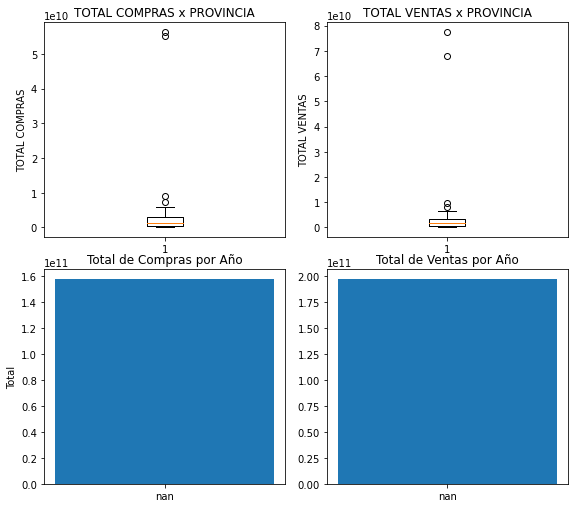

In [10]:
#Grafica de los clústeres
fig, axs = plt.subplots(2, 2, figsize=(8,7))
fig.tight_layout()
plt.tight_layout()
axs[0][0].boxplot(data_agregada_provincia2['TOTAL_COMPRAS'])
axs[0][0].set_title('TOTAL COMPRAS x PROVINCIA')
axs[0][0].set_ylabel('TOTAL COMPRAS')

axs[0][1].boxplot(data_agregada_provincia2['TOTAL_VENTAS'])
axs[0][1].set_title('TOTAL VENTAS x PROVINCIA')
axs[0][1].set_ylabel('TOTAL VENTAS')

axs[1][0].bar(data_agregada_anio['AÑO'],data_agregada_anio['TOTAL_COMPRAS'])
axs[1][0].set_title('Total de Compras por Año')
axs[1][0].set_ylabel('Total')


axs[1][1].bar(data_agregada_anio['AÑO'],data_agregada_anio['TOTAL_VENTAS'])
axs[1][1].set_title('Total de Ventas por Año')


plt.show()

In [11]:
#ESTE ES POR PROVINCIA NO PARA SWITCHEAR
#dataset_consolidado_provincia=pd.merge(data_agregada_provincia, data_poblacion_provincia, on=['PROVINCIA'], how='inner')
dataset_consolidado_provincia=pd.merge(data_agregada_provincia, data_poblacion_canton, on=['PROVINCIA','CANTON'], how='inner')

#Estandarización por cada 100000 habitantes para cada provincia
campos_numericos_100K=['Ventas netas tarifa 12_CM%','Ventas netas tarifa 0%_CM','EXPORTACIONES_CM',
                 'Compras netas tarifa 12%_CM','Compras netas tarifa 0%_CM','IMPORTACIONES_CM'
                ,'COMPRAS_RISE_CM' ,'TOTAL_COMPRAS_CM','TOTAL_VENTAS_CM']


# Estandarización de datos numéricos de acuerdo al número de habitantes (x cada 10000 habitantes )
contador_campos_numericos=0
for campo in campos_numericos_100K:    
  dataset_consolidado_provincia[campo]=dataset_consolidado_provincia[campos_numericos[contador_campos_numericos]]*10000/dataset_consolidado_provincia['POBLACION']
  contador_campos_numericos=contador_campos_numericos+1


In [12]:
dataset_consolidado_provincia

,PROVINCIA,CANTON,Ventas netas tarifa 12%,Ventas netas tarifa 0%,EXPORTACIONES,Compras netas tarifa 12%,Compras netas tarifa 0%,IMPORTACIONES,COMPRAS_RISE,TOTAL_COMPRAS,...,POBLACION,Ventas netas tarifa 12_CM%,Ventas netas tarifa 0%_CM,EXPORTACIONES_CM,Compras netas tarifa 12%_CM,Compras netas tarifa 0%_CM,IMPORTACIONES_CM,COMPRAS_RISE_CM,TOTAL_COMPRAS_CM,TOTAL_VENTAS_CM
0,AZUAY,CAMILO PONCE ENRIQUEZ,42370549,64797156,36973525,71274569,47641063,532826,1951388,121399847,...,36423,11632910,17790176,10151147,19568561,13079939,146288,535757,33330546,39574233
1,AZUAY,CHORDELEG,9671623,5348753,0,12483424,3020666,140479,83070,15727639,...,15176,6372972,3524481,0,8225767,1990423,92567,54738,10363495,9897453
2,AZUAY,CUENCA,5688290206,3278778268,164170817,4133116585,1297845785,1501756677,49985918,6988825098,...,636996,89298680,51472510,2577266,64884498,20374473,23575606,784713,109715369,143348487
3,AZUAY,EL PAN,817762,388796,0,1514970,253129,276,5173,1773548,...,3091,2645622,1257833,0,4901229,818922,892,16737,5737780,3903455
4,AZUAY,GIRON,6114530,8696460,0,8869750,3170480,180373,62519,12283123,...,13037,4690136,6670599,0,6803521,2431909,138355,47955,9421740,11360735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,ZAMORA CHINCHIPE,PALANDA,3634169,4700501,0,7998646,3042351,1061,324751,11366809,...,10144,3582580,4633774,0,7885101,2999163,1046,320141,11205451,8216355
217,ZAMORA CHINCHIPE,PAQUISHA,3856846,6899866,626,12989151,1610278,27940,25899,14653268,...,5992,6436658,11515130,1044,21677488,2687381,46629,43222,24454720,17952832
218,ZAMORA CHINCHIPE,YACUAMBI,1711494,691490,0,3273342,794412,9382,17885,4095020,...,7121,2403447,971058,0,4596744,1115590,13175,25116,5750625,3374505
219,ZAMORA CHINCHIPE,YANTZAZA,94771682,61867876,736058468,273764845,82082170,40155908,514043,410749957,...,26447,35834568,23393155,278314541,103514518,31036477,15183540,194367,155310605,337542264


In [13]:
# Obtención de dataset únicamente con datos numéricos para aplicar procesos de normalización, PCA y clusterización
dataset_consolidado_provincia_Num=dataset_consolidado_provincia.loc[:,campos_numericos_100K ]


In [14]:
#Normalización de datos
scaler=StandardScaler()
dataset_normalizado=scaler.fit_transform(dataset_consolidado_provincia_Num)


Text(0, 0.5, 'Acumulaciòn de varianza explicada')

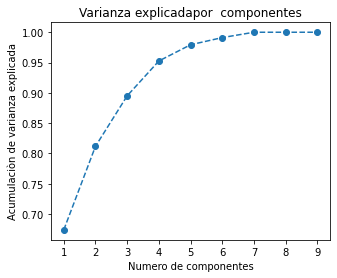

In [15]:
#PCA
# Obtención de  varianza a fin de de determinar qué número de componentees 
#tienen una alta representación de la data 
pca=PCA()
pca.fit(dataset_normalizado)
pca.explained_variance_ratio_
plt.figure(figsize=(5,4))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicadapor  componentes')
plt.xlabel('Numero de componentes')
plt.ylabel('Acumulaciòn de varianza explicada')

In [16]:
# Cálculo de PCA utilizado 2 componentes 
pca=PCA(n_components=2)
pca.fit(dataset_normalizado)
pca.transform(dataset_normalizado)
scores_pca=pca.transform(dataset_normalizado)


In [17]:
# CLUSTERIZACION KMEANS
metricas_evaluacion_kmeans=list()
data_for_scatter=scores_pca
componente1= pd.DataFrame(scores_pca)[0]
componente2= pd.DataFrame(scores_pca)[1]
numero_clusters= range(1,10)
for nro_clusters in numero_clusters:
  kmeans = KMeans(n_clusters = nro_clusters).fit(data_for_scatter)
  if nro_clusters>=2: 
    silhouette_score_mean = silhouette_score(scores_pca,kmeans.labels_, metric='euclidean')
  else :
    silhouette_score_mean =0
  metricas_evaluacion_kmeans.append({'Nro Clusters':nro_clusters, 'silueta':silhouette_score_mean,'inercia':kmeans.inertia_,  'cluster':  kmeans.labels_, 'x':componente1,  'y':componente2})




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


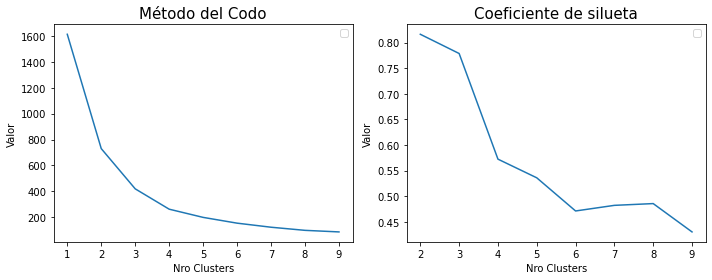

In [18]:

## Creación de un gráfico de 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10,4))
plt.tight_layout()

#Configuración de los subplots y gráfica de los resultados obtenidos
## Obtención de los valores correspondientes a silueta e inercia (método del codo)
inercia=pd.DataFrame(*[metricas_evaluacion_kmeans[0:9]])['inercia']
silueta=pd.DataFrame(*[metricas_evaluacion_kmeans[1:9]])['silueta']

axs[0].plot(range(1,10),inercia)
axs[0].set_title("Método del Codo",fontsize=15)
axs[0].set_xlabel("Nro Clusters",fontsize=10)
axs[0].set_ylabel("Valor",fontsize=10)
axs[0].set_xticks(range(1,10, 1))
axs[0].legend()
#axs[0].grid()

axs[1].plot(range(2,10),silueta)
axs[1].set_title("Coeficiente de silueta",fontsize=15)
axs[1].set_xlabel("Nro Clusters",fontsize=10)
axs[1].set_ylabel("Valor",fontsize=10)
axs[1].set_xticks(range(2,10, 1))
axs[1].legend()
#axs[1].grid()

fig.tight_layout()
plt.show()

Text(0.5, 1.0, '3 Clústers')

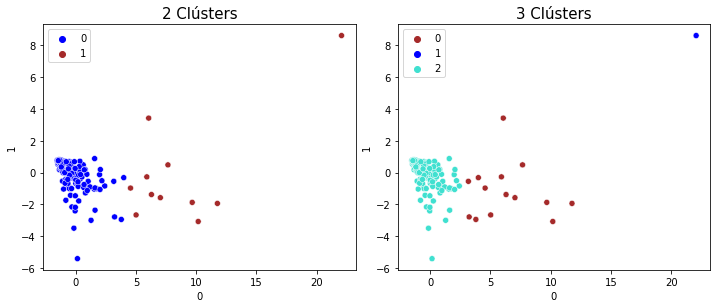

In [19]:
#Grafica de los clústeres
fig, axs = plt.subplots(1, 2, figsize=(10,4))
plt.tight_layout()
eje_x=pd.DataFrame(*[metricas_evaluacion_kmeans[1:3]])['x']
eje_y=pd.DataFrame(*[metricas_evaluacion_kmeans[1:3]])['y']
cluster=pd.DataFrame(*[metricas_evaluacion_kmeans[1:3]])['cluster']
sns.scatterplot(ax=axs[0], x=eje_x[0], y=eje_y[0], hue=cluster[0], palette=['b','brown'])
sns.scatterplot(ax=axs[1], x=eje_x[1], y=eje_y[1], hue=cluster[1], palette={0:"brown",  1:"blue", 2:"turquoise"})
axs[0].set_title("2 Clústers",fontsize=15)
axs[1].set_title("3 Clústers",fontsize=15)




In [20]:
# Asignación de los cálculos para dos clústeres a la data consolidada
dataset_consolidado_provincia['cluster']=cluster[1]
# Obtención de datos resumen 
print(dataset_consolidado_provincia.groupby('cluster').count()['CANTON'])
# Obtención de datos resumen por la media
Centers_mean= dataset_consolidado_provincia.groupby('cluster')[campos_numericos_100K].mean().reset_index()
Centers_mean

cluster
0     14
1      1
2    206
Name: CANTON, dtype: int64


,cluster,Ventas netas tarifa 12_CM%,Ventas netas tarifa 0%_CM,EXPORTACIONES_CM,Compras netas tarifa 12%_CM,Compras netas tarifa 0%_CM,IMPORTACIONES_CM,COMPRAS_RISE_CM,TOTAL_COMPRAS_CM,TOTAL_VENTAS_CM
0,0,66760624,86356993,53025986,75082655,65693288,27434641,833479,170112899,206143360
1,1,150964317,78247165,712915159,312494001,77606259,80997438,58540,471409249,942126641
2,2,9650251,14379511,2267889,12828928,10056886,915355,437976,24248996,26297504


([<matplotlib.axis.XTick at 0x249016ecfd0>,
 [Text(0, 0, 'Ventas netas tarifa 12_CM%'),
  Text(1, 0, 'Ventas netas tarifa 0%_CM'),
  Text(2, 0, 'EXPORTACIONES_CM'),
  Text(3, 0, 'Compras netas tarifa 12%_CM'),
  Text(4, 0, 'Compras netas tarifa 0%_CM'),
  Text(5, 0, 'IMPORTACIONES_CM'),
  Text(6, 0, 'COMPRAS_RISE_CM'),
  Text(7, 0, 'TOTAL_COMPRAS_CM'),
  Text(8, 0, 'TOTAL_VENTAS_CM')])

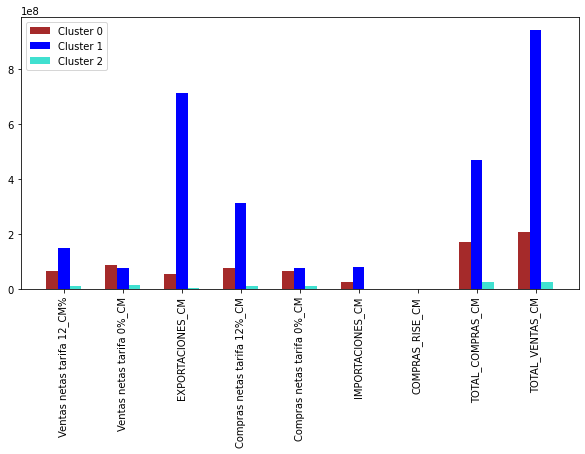

In [21]:
##Impresión de un gráfico de barras con los totales por cada valor que toma el atributo 'class'
plt.figure(figsize=(10,5))
x= np.arange(len(campos_numericos_100K))
ejex=0.1
plt.bar(x-0.2,Centers_mean.iloc[0][campos_numericos_100K],0.2,color='brown')
plt.bar(x,Centers_mean.iloc[1][campos_numericos_100K],0.2,  color='blue')
plt.bar(x+0.2,Centers_mean.iloc[2][campos_numericos_100K],0.2,color='turquoise')
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"])
plt.xticks(x,campos_numericos_100K,rotation = 90)

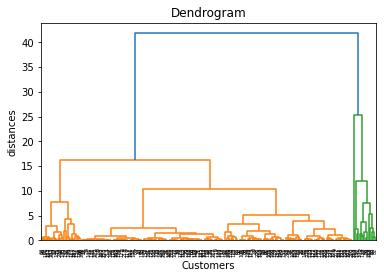

In [22]:
#CLUSTERIZACION JERARQUICA
#DENDOGRAMA

dendrogram = sch.dendrogram(sch.linkage(data_for_scatter, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

In [23]:
metricas_evaluacion_aglomerativo=list()
numero_clusters= range(1,10)
for nro_clusters in numero_clusters:
  yhc = AgglomerativeClustering(n_clusters = nro_clusters).fit(data_for_scatter)
  if nro_clusters>=2: 
    silhouette_score_mean = silhouette_score(scores_pca,yhc.labels_, metric='euclidean')
  else :
    silhouette_score_mean =0
  metricas_evaluacion_aglomerativo.append({'Nro Clusters':nro_clusters, 'silueta':silhouette_score_mean,  'cluster':  yhc.labels_, 'x':componente1,  'y':componente2})



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


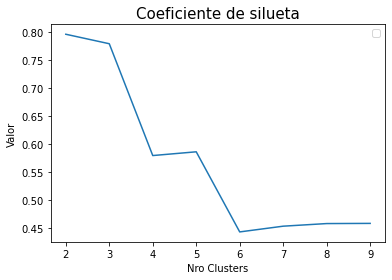

In [24]:
## Creación de un gráfico de 2 subplots

plt.tight_layout()

#Configuración de los subplots y gráfica de los resultados obtenidos
## Obtención de los valores correspondientes a silueta e inercia (método del codo)

silueta=pd.DataFrame(*[metricas_evaluacion_aglomerativo[1:9]])['silueta']

plt.plot(range(2,10),silueta)
plt.title("Coeficiente de silueta",fontsize=15)
plt.xlabel("Nro Clusters",fontsize=10)
plt.ylabel("Valor",fontsize=10)
plt.xticks(range(2,10, 1))
plt.legend()
#axs[0].grid()

fig.tight_layout()
plt.show()

Text(0.5, 1.0, '3 Clústers')

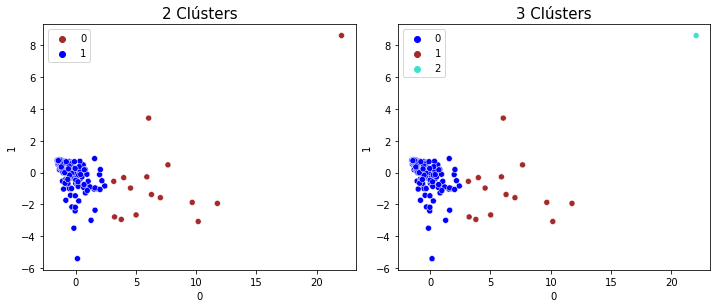

In [25]:
#Grafica de los clústeres
fig, axs = plt.subplots(1, 2, figsize=(10,4))
plt.tight_layout()
eje_x=pd.DataFrame(*[metricas_evaluacion_aglomerativo[1:3]])['x']
eje_y=pd.DataFrame(*[metricas_evaluacion_aglomerativo[1:3]])['y']
cluster=pd.DataFrame(*[metricas_evaluacion_aglomerativo[1:3]])['cluster']
sns.scatterplot(ax=axs[0], x=eje_x[0], y=eje_y[0], hue=cluster[0], palette={1:"blue",  0:"brown"})
sns.scatterplot(ax=axs[1], x=eje_x[1], y=eje_y[1], hue=cluster[1], palette={0:"blue",  1:"brown", 2:"turquoise"})
axs[0].set_title("2 Clústers",fontsize=15)
axs[1].set_title("3 Clústers",fontsize=15)


In [26]:
# Asignación de los cálculos para dos clústeres a la data consolidada
dataset_consolidado_provincia['cluster1']=cluster[1]
# Obtención de datos resumen 
print(dataset_consolidado_provincia.groupby('cluster1').count()['CANTON'])

Centers_mean_hc= dataset_consolidado_provincia.groupby('cluster1')[campos_numericos_100K].mean().reset_index()
Centers_mean_hc.iloc[0:3][campos_numericos_100K]

cluster1
0    206
1     14
2      1
Name: CANTON, dtype: int64


,Ventas netas tarifa 12_CM%,Ventas netas tarifa 0%_CM,EXPORTACIONES_CM,Compras netas tarifa 12%_CM,Compras netas tarifa 0%_CM,IMPORTACIONES_CM,COMPRAS_RISE_CM,TOTAL_COMPRAS_CM,TOTAL_VENTAS_CM
0,9650251,14379511,2267889,12828928,10056886,915355,437976,24248996,26297504
1,66760624,86356993,53025986,75082655,65693288,27434641,833479,170112899,206143360
2,150964317,78247165,712915159,312494001,77606259,80997438,58540,471409249,942126641


([<matplotlib.axis.XTick at 0x2490393c640>,
 [Text(0, 0, 'Ventas netas tarifa 12_CM%'),
  Text(1, 0, 'Ventas netas tarifa 0%_CM'),
  Text(2, 0, 'EXPORTACIONES_CM'),
  Text(3, 0, 'Compras netas tarifa 12%_CM'),
  Text(4, 0, 'Compras netas tarifa 0%_CM'),
  Text(5, 0, 'IMPORTACIONES_CM'),
  Text(6, 0, 'COMPRAS_RISE_CM'),
  Text(7, 0, 'TOTAL_COMPRAS_CM'),
  Text(8, 0, 'TOTAL_VENTAS_CM')])

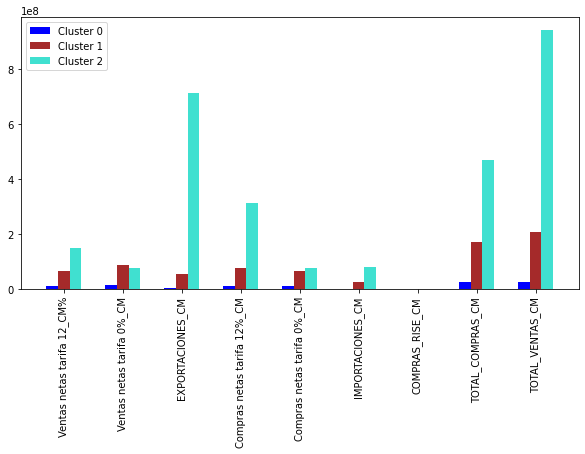

In [27]:
##Impresión de un gráfico de barras con los totales por cada valor que toma el atributo 'class'
plt.figure(figsize=(10,5))
x= np.arange(len(campos_numericos_100K))
ejex=0.1
plt.bar(x-0.2,Centers_mean_hc.iloc[0][campos_numericos_100K],0.2,color='blue')
plt.bar(x,Centers_mean_hc.iloc[1][campos_numericos_100K],0.2,color='brown')
plt.bar(x+0.2,Centers_mean_hc.iloc[2][campos_numericos_100K],0.2,color='turquoise')
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"])
plt.xticks(x,campos_numericos_100K,rotation = 90)

<BarContainer object of 2 artists>

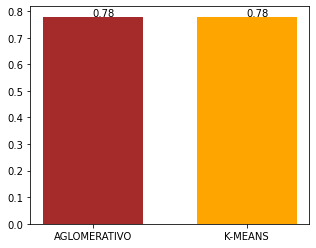

In [28]:
#Comparación de resultados.

valores_siluetas=[metricas_evaluacion_kmeans[2]['silueta'] ,metricas_evaluacion_aglomerativo[2]['silueta']]

plt.figure(figsize=(5,4))

for i, valor in enumerate(valores_siluetas):
    plt.text( i,valor+0.002,str(round(valor,2)))
plt.bar(['AGLOMERATIVO','K-MEANS'],valores_siluetas, color=['brown','orange'],width=0.65)


<AxesSubplot:>

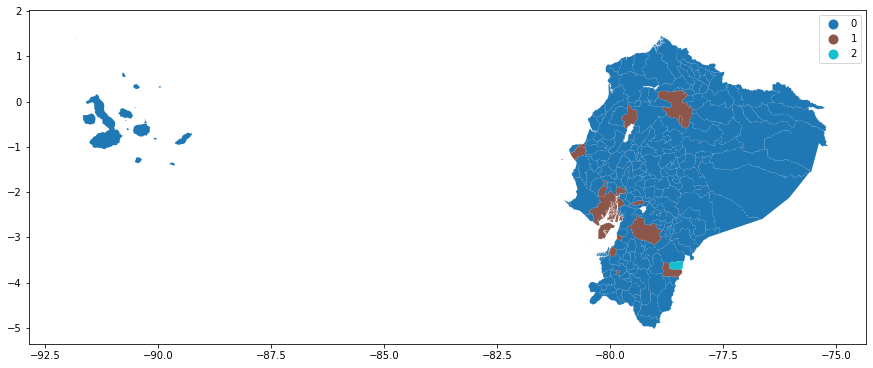

In [29]:
#DESPLIEGUE DE MAPA PINTADO POR CLUSTERS

cantones='https://raw.githubusercontent.com/byronodg/REPOSITORIO_TFM/main/CLUSTERIZACION/cantones.geojson'
geo_cantones = gpd.read_file(cantones,encoding='utf-8')
geo_cantones=geo_cantones.rename(columns ={'DPA_DESPRO': 'PROVINCIA'}, inplace = False)
geo_cantones=geo_cantones.rename(columns ={'DPA_DESCAN': 'CANTON'}, inplace = False)
datos_final=gpd.GeoDataFrame(pd.merge(dataset_consolidado_provincia, geo_cantones, on=['PROVINCIA','CANTON'], how='inner'))
datos_final.plot(column = 'cluster1',figsize=(15, 10), categorical=True, legend=True)

#EN CASO DE HACER EXPOSICION DEMOSTRATIVA
#datos_final.explore(
 #    column="cluster", # make choropleth based on "BoroName" column
  #   tooltip=["PROVINCIA","CANTON"], # show "BoroName" value in tooltip (on hover)
   #  popup=True, # show all values in popup (on click)
    # tiles="CartoDB positron", # use "CartoDB positron" tiles
     #cmap="Set1", # use "Set1" matplotlib colormap
     #style_kwds=dict(color="black") # use black outline
    #)




In [30]:
#TOP CANTONES POR POBLACION
datos_final.sort_values(by=['POBLACION'], inplace=True, ascending=False)
datos_final[['CANTON','POBLACION','cluster','TOTAL_COMPRAS','TOTAL_COMPRAS_CM','TOTAL_VENTAS','TOTAL_VENTAS_CM']].head(10)



,CANTON,POBLACION,cluster,TOTAL_COMPRAS,TOTAL_COMPRAS_CM,TOTAL_VENTAS,TOTAL_VENTAS_CM
188,QUITO,2781641,0,51445044999,184944948,71344754648,256484408
86,GUAYAQUIL,2723665,0,42929050171,157615016,53022909030,194674855
2,CUENCA,636996,0,6988825098,109715369,9131241251,143348487
195,SANTO DOMINGO,458580,2,2595890874,56607154,2828762299,61685252
203,AMBATO,387309,2,2990139274,77202938,3508146013,90577446
151,PORTOVIEJO,321800,2,1351029571,41983517,1314486709,40847940
82,DURAN,315724,0,5175543976,163926213,6181161443,195777370
59,MACHALA,289141,0,3410519194,117953497,4021671203,139090312
113,LOJA,274112,2,1189183724,43383133,1412637837,51535060
145,MANTA,264281,2,2191201496,82911806,2540880263,96143130
